In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
import matplotlib.pyplot as plt
import random
random.seed(10)
import plotly.express as px


In [128]:
import os
%cd '/content/drive/MyDrive/Optimisation'

/content/drive/MyDrive/Optimisation


## I.  Data visualization

Marrital : 
2 = married 
1 = divorced
0 = single

Contact :      
0 = unknown
1 = cellular/telephone

Poutcome :       
0 = unknown 
-1 = failure 

In [129]:
df = pd.read_excel('bank.xls')
# Delete empty lines 
df = df.dropna()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,2,secondary,0,2343,1,0,0,5,may,1042,1,-1,0,0,1
1,56,admin.,2,secondary,0,45,0,0,0,5,may,1467,1,-1,0,0,1
2,41,technician,2,secondary,0,1270,1,0,0,5,may,1389,1,-1,0,0,1
3,55,services,2,secondary,0,2476,1,0,0,5,may,579,1,-1,0,0,1
4,54,admin.,2,tertiary,0,184,0,0,0,5,may,673,2,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,0,primary,0,1,1,0,1,20,apr,257,1,-1,0,0,0
11158,39,services,2,secondary,0,733,0,0,0,16,jun,83,4,-1,0,0,0
11159,32,technician,0,secondary,0,29,0,0,1,19,aug,156,2,-1,0,0,0
11160,43,technician,2,secondary,0,0,0,1,1,8,may,9,2,172,5,-1,0


In [130]:
df.shape

(11162, 17)

In [131]:
df.describe()

,age,marital,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1.253808,0.015051,1528.538524,0.473123,0.130801,0.789823,15.658036,371.993818,2.508421,51.330407,0.832557,0.034044,0.473840
std,11.913369,0.905437,0.121761,3225.413326,0.499299,0.337198,0.407453,8.420740,347.128386,2.722077,108.758282,2.292007,0.502931,0.499338
min,18.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,0.000000,122.000000,0.000000,0.000000,1.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,2.000000,0.000000,550.000000,0.000000,0.000000,1.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,49.000000,2.000000,0.000000,1708.000000,1.000000,0.000000,1.000000,22.000000,496.000000,3.000000,20.750000,1.000000,0.000000,1.000000
max,95.000000,2.000000,1.000000,81204.000000,1.000000,1.000000,1.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000,1.000000


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  int64 
 3   education  11162 non-null  object
 4   default    11162 non-null  int64 
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  int64 
 7   loan       11162 non-null  int64 
 8   contact    11162 non-null  int64 
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  int64 
 16  deposit    11162 non-null  int64 
dtypes: int64(14), object(3)
memory usage: 1.5+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



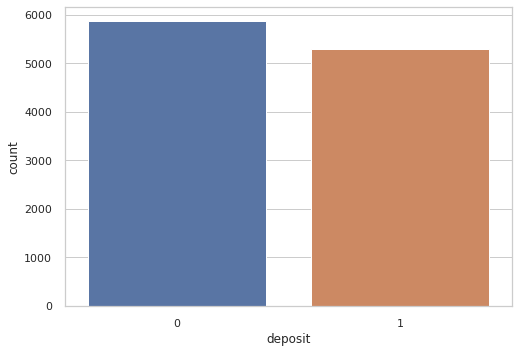

In [133]:
sns.countplot(df['deposit'])

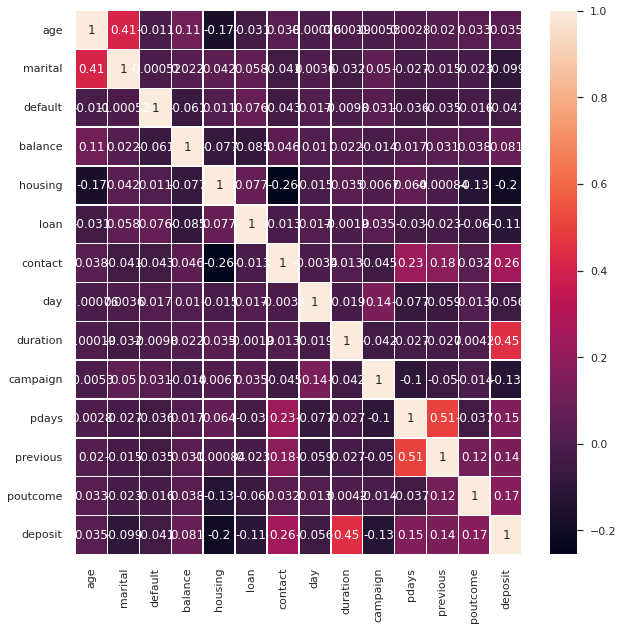

In [134]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

#sns.heatmap(df.corr(), annot=True)

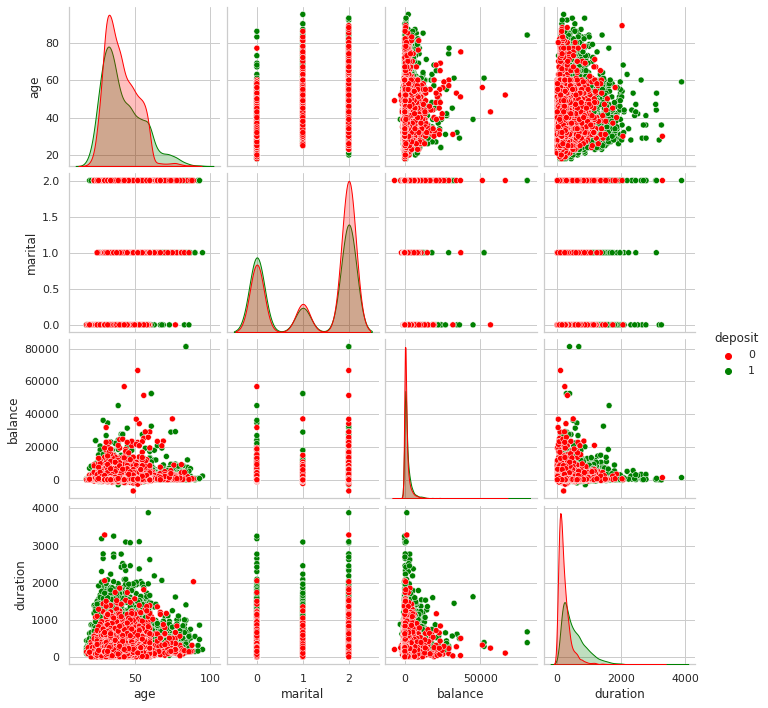

In [ ]:
sns.pairplot(df[['age','marital','balance','deposit','duration']], hue='deposit', palette =['red','green']) 
plt.show()

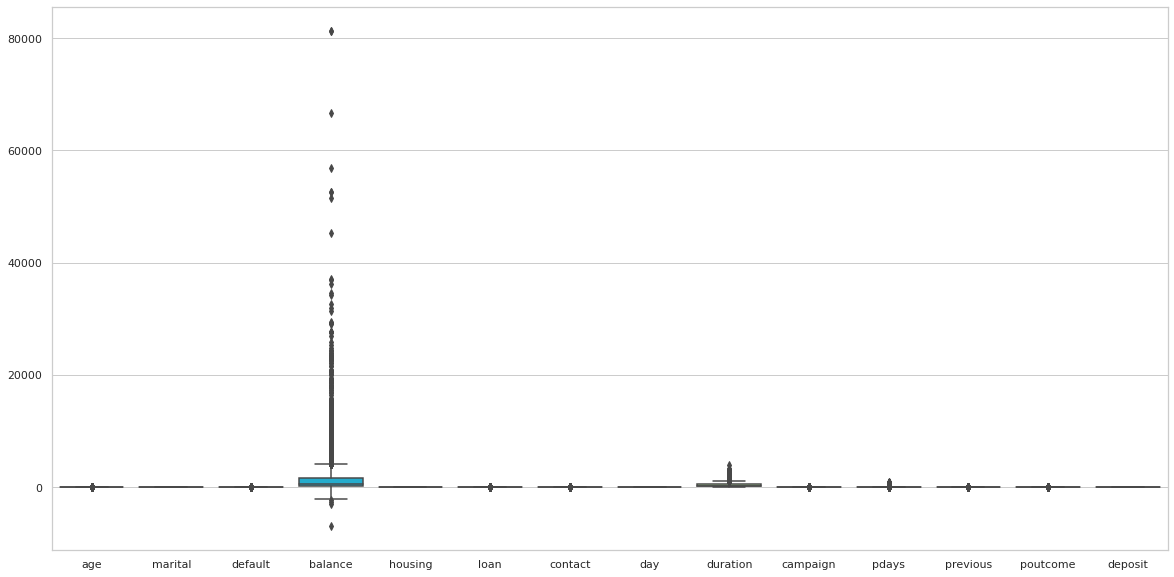

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data =df, orient='v', palette='rainbow')

In [ ]:

features = 

fig = px.scatter_matrix(
    df,
    dimensions=features,
    color="deposit"
)
fig.update_traces(diagonal_visible=False)
fig.show()

from those plot we can observe :
Now we divide in train and test dataset

In [135]:
df_ = df
df_train = df.sample(n=8000, random_state=1)
df_test = df_.drop(df_train.index)

In [136]:
df_float = df_train[['age','marital','default','balance','housing','loan','contact','day','duration','campaign','pdays','previous','poutcome','deposit']]
A = df_float.values
df_float1 = df_test[['age','marital','default','balance','housing','loan','contact','day','duration','campaign','pdays','previous','poutcome','deposit']]
A1 = df_float1.values


In [137]:
mA = A.mean(axis=0)
sA = A.std(axis=0)
A = (A-mA)/sA
A1 = (A1-mA)/sA

In [138]:
y = df_train['deposit'].values
y1 = df_test['deposit'].values

## II. GD

In [139]:
y[y==0] = -1
n = A.shape[0]

In [140]:
L = np.linalg.norm(A, ord=2) ** 2 / (4. * n) 
tau_max = 2/L
print('tau_max',2/L)

tau_max 4.033111484833061


In [141]:
# Initialization of x global 
d = A.shape[1]
x_init = np.zeros(d)

# Logistic function
def logistic(x):
    return np.log(1+np.exp(x))

# Compute gradient function
def calcul_grad(A,y,x,lambda):
      # p = yAx
        p = y * A.dot(x)
        n = A.shape[0]
        aux = 1. / (1. + np.exp(p))
        return - (A.T).dot(y * aux) / n + lambda * x

# Logistic cost function
def logistic_cost(A,y,x,lambda):
      # p = yAx
        p = y * A.dot(x)
        return np.mean(logistic(-p)) + lambda * np.linalg.norm(x) ** 2 / 2.


#Gradient descent function : 
def gradient_descent(A,y,tau,nbr_iter,lambda):
    x = x_init
    costs = []
    grads = []
    for i in range(nbr_iter):
        gd = calcul_grad(A,y,x,lambda)
        grads.append(np.linalg.norm(gd))
        x = x-tau*gd
        func = logistic_cost(A,y,x,lambda)
        costs.append(func)
    return x,costs,grads

In [ ]:
tau = 1/(2*L)
nbr_iter = 100
lambda = 0
x,costs1,gd = gradient_descent(A,y,tau,nbr_iter,lambda)

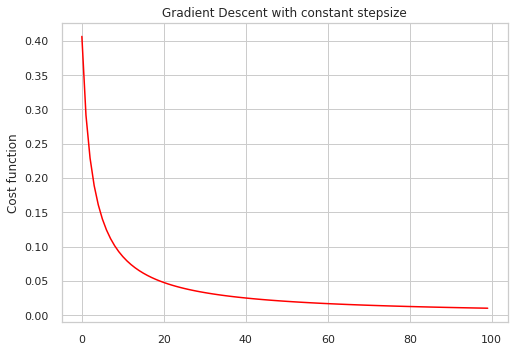

In [ ]:
# Plot GD 
plt.plot(range(nbr_iter),costs1, color = 'red')
plt.title('Gradient Descent with constant stepsize')
plt.ylabel('Cost function')
plt.show()

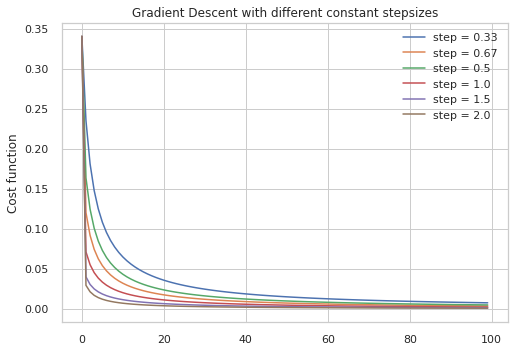

In [ ]:
#We compute the GD with several constant stepsize
tau_val = [1/3 * tau_max, 2/3 * tau_max, tau_max/2, tau_max, 1.5* tau_max,2* tau_max]
nbr_iter = 100
lambda = 0
for tau in tau_val :
    x,costs,_ = gradient_descent(A,y,tau,nbr_iter,lambda)
    costs[0] = 0.3404029800123056
    plt.plot(range(nbr_iter),costs, label='step = ' + str(round(tau/tau_max,2)))
    plt.title('Gradient Descent with different constant stepsizes')
    plt.ylabel('Cost function')
    plt.legend()
plt.show()


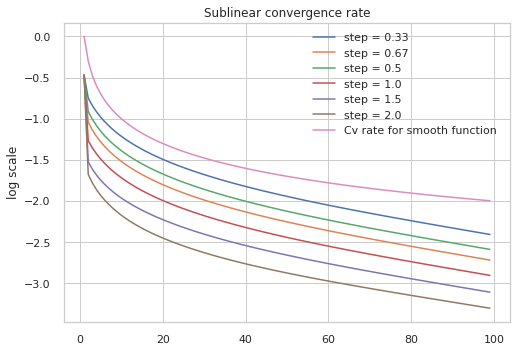

In [ ]:
# Let's see the sublinear cv rate
nbr_iter = 200
ndisp = int(nbr_iter/2)
lambda = 0
for tau in tau_val :
    x,cost_values,_ = gradient_descent(A,y,tau,nbr_iter,lambda)
    cost_values[1] = 0.3404029800123056
    plt.plot(np.arange(1,ndisp), np.log10(cost_values[1:ndisp]-np.min(cost_values)), label= 'step = '+ str(round(tau/tau_max,2)))
    plt.title('Sublinear convergence rate')
    plt.ylabel('log scale')
    plt.legend()
plt.plot(np.arange(1,ndisp),np.log10(1/np.arange(1,ndisp)),label = 'Cv rate for smooth function ')
plt.legend()
plt.show()

-> function convex but not strongly convex

## II. Nesterov 

In [ ]:
#Nesterov function
def nesterov_GD(A,y,tau,nbr_iter,lambda):
    z_init = np.random.randn(d)
    x = x_init
    z = z_init
    x_h = [x]
    costs = [logistic_cost(A,y,x,lambda)]
    lambda_nesterov = 0
    for i in range(1,nbr_iter):
        gd = calcul_grad(A,y,z,lambda)
        x = z-tau*gd
        lambda_nesterov = 0.5*(1+np.sqrt(1+4*(lambda_nesterov**2)))
        lambda_nesterov_t1 = 0.5*(1+np.sqrt(1+4*(lambda_nesterov**2)))
        beta = (lambda_nesterov-1)/lambda_nesterov_t1
        z = x + beta*(x - x_h[-1])
        x_h.append(x)
        func = logistic_cost(A,y,x,lambda)
        costs.append(func)
    return x,costs

In [ ]:
tau = 1/(L)
nbr_iter = 100
lambda = 0
x,costs2 = nesterov_GD(A,y,tau,nbr_iter,lambda)
x,costs3 = nesterov_GD(A,y,tau/2,nbr_iter,lambda)

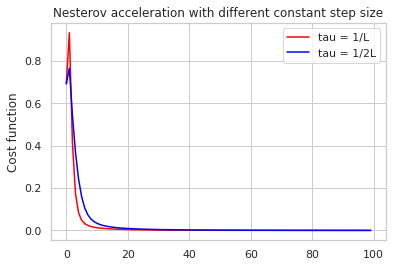

In [ ]:
#Comparison of nesterov with 2 taus
plt.plot(range(nbr_iter),costs2, color = 'red',label='tau = 1/L')
plt.plot(range(nbr_iter),costs3, color = 'blue',label='tau = 1/2L')
plt.title('Nesterov acceleration with different constant step size')
plt.ylabel('Cost function')
plt.legend()
plt.show()

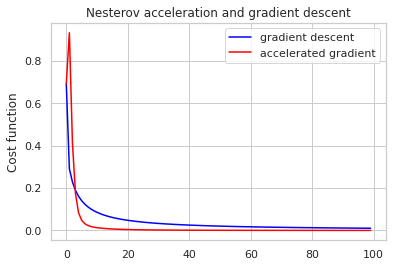

In [ ]:
#Comparison of nesterov and GD
costs1[0] = costs2[0]
plt.plot(range(nbr_iter),costs1, color = 'blue',label='gradient descent')
plt.plot(range(nbr_iter),costs2, color = 'red',label='accelerated gradient')
plt.title('Nesterov acceleration and gradient descent')
plt.ylabel('Cost function')
plt.legend()
plt.show()

As It is expected, the Nesterov algo converges faster than simple Gradient


Convergence rate


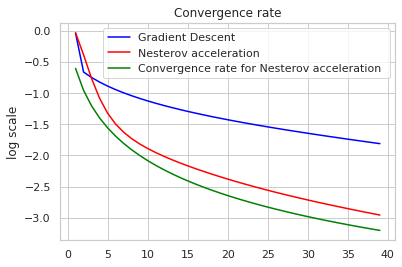

In [ ]:
#Convergence rate of nesterov vs GD
nbr_iter = 80
ndisp = int(nbr_iter/2)
lambda = 0

plt.plot(np.arange(1,ndisp), np.log10(costs1[1:ndisp]-np.min(costs1)), color = 'blue',label='Gradient Descent')
plt.plot(np.arange(1,ndisp), np.log10(costs2[1:ndisp]-np.min(costs2)), color = 'red',label='Nesterov acceleration')
plt.plot(np.arange(1,ndisp),2*np.log10(1/(1+np.arange(1,ndisp)) ),color = 'green',label = 'Convergence rate for Nesterov acceleration ')

plt.title('Convergence rate')
plt.ylabel('log scale')
plt.legend()
plt.show()

The convergence rate of Nesterov in log scale should be of O(2 log(1/k))


## III. Stochastic gradient 

In [ ]:
#Gradient for each step i
def grad_i(A, i, x, y, lambda):
        grad = - A[i] * y[i] / (1. + np.exp(y[i]* A[i].dot(x)))
        grad = grad + lambda * x
        return grad 

#Stochastic gradient function 
def stochastic_grad(A,tau,y,lambda,nbr,nbr_iter) :
    n = A.shape[0]
    x = x_init
    costs = []
    val_costs = []

    for k in range(nbr_iter): 
      # batch gradient
      i_k = np.random.choice(n,nbr,replace=False)
      s = np.zeros(d)
      for j in range(nbr):
        g_i = grad_i(A,i_k[j],x,y,lambda)
        s = s + g_i
      s = (1/nbr)*s
      x = x - tau * s
      if ((k*nbr) % n )== 0: 
        func = logistic_cost(A,y,x,lambda)
        costs.append(func)
        val_func = logistic_cost(A1,y1,x,lambda)
        val_costs.append(val_func)

    return x, costs, val_costs


In [ ]:
# Setting all parameters for stochastic gradient
tau = 1/(2*L)
nbr_epoch = 500
lambda = 0
nbr = 1
n = 1000
nbr_iter=int(nbr_epoch*n/nbr)

x,costs,val_costs = stochastic_grad(A,tau,y,lambda,nbr, nbr_iter)

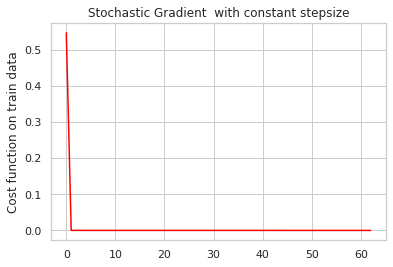

In [ ]:
# Plot SG with constant tau = 1/(2*L)
plt.plot(range(63),costs, color = 'red')
plt.title('Stochastic Gradient  with constant stepsize')
plt.ylabel('Cost function on train data')
plt.show()

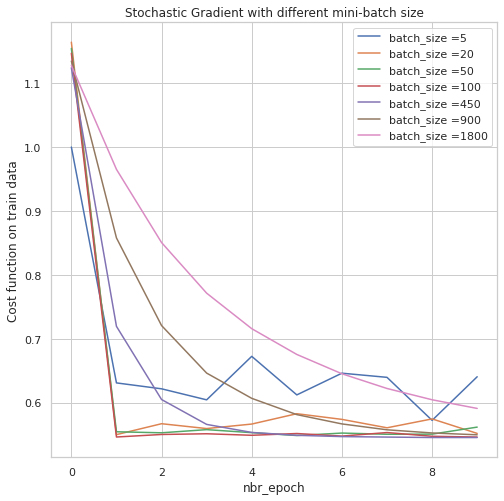

In [ ]:
# PLot SG with different batch size on train data
plt.figure(figsize = (8,8))
tau = 1/(2*L)
nbr_epoch = 10
lambda = 0
nbr = [5,20,50,100,450,900,1800]

for size in nbr : 

    nbr_iter = nbr_epoch*n//size

    x,costs,val_costs = stochastic_grad(A,tau,y,lambda,size, nbr_iter)
    plt.plot(range(nbr_epoch),costs, label = 'batch_size ='+str(size))
plt.title('Stochastic Gradient with different mini-batch size')
plt.ylabel('Cost function on train data')
plt.xlabel('nbr_epoch')
plt.legend()
plt.show()

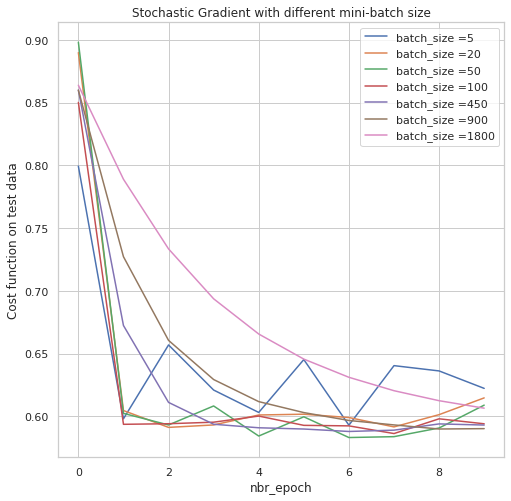

In [ ]:
# PLot SG with different batch size on test data

plt.figure(figsize = (8,8))
tau = 1/(2*L)
nbr_iter = 100
lambda = 0

for size in nbr : 
    nbr_iter = nbr_epoch*n//size
    x,costs,val_costs = stochastic_grad(A,tau,y,lambda,size, nbr_iter)
    plt.plot(range(nbr_epoch),val_costs, label = 'batch_size ='+str(size))
plt.title('Stochastic Gradient with different mini-batch size')
plt.ylabel('Cost function on test data')
plt.xlabel('nbr_epoch')
plt.legend()
plt.show()

Modifier x pour qu'il soit defini en variable globale sinon les erreurs ne partiront pas du même endroit 

We are going to see the impact of the learning rate on train loss

In [ ]:
#Second SG function to deal with learning rate
def stochastic_grad2(A,tau,y,lambda,nbr, nbr_iter) :
    n = A.shape[0]
    x = x_init
    costs = []
    val_costs = []
    
    for k in range(nbr_iter): 
        # batch gradient
        i_k = np.random.choice(n,nbr,replace=False)
            
        s = np.zeros(d)
        for j in range(nbr):
            g_i = grad_i(A,i_k[j],x,y,lambda)
            s = s + g_i
        s = (1/nbr)*s
        x = x - tau * s
        func = logistic_cost(A,y,x,lambda)
        costs.append(func)
        val_func = logistic_cost(A1,y1,x,lambda)
        val_costs.append(val_func)

    return x, costs, val_costs

In [ ]:
taus = [tau_max, 1/2 *tau_max ,1/3 * tau_max, 1/5 * tau_max, 1/10 *tau_max,1/30*tau_max]


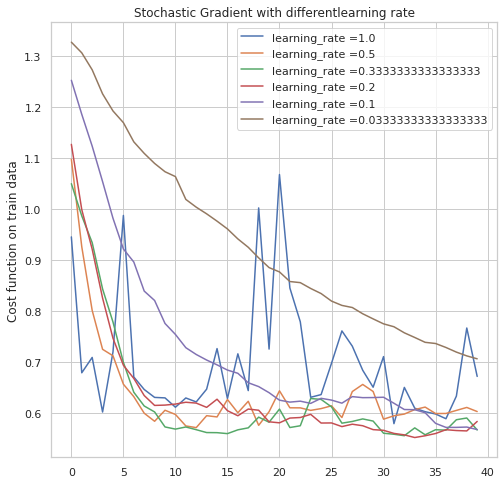

In [ ]:
#Impact of the learning rate on train loss
plt.figure(figsize = (8,8))
lambda = 0
size = 20
nbr_iter = 40
for tau in taus : 
    x,costs,val_costs = stochastic_grad2(A,tau,y,lambda,size, nbr_iter)
    plt.plot(range(nbr_iter),costs, label = 'learning_rate ='+str(tau/tau_max))
plt.title('Stochastic Gradient with different learning rate')
plt.ylabel('Cost function on train data')
plt.legend()
plt.show()

In [ ]:
Now we are going to see the impact of the learning rate on the validation loss :

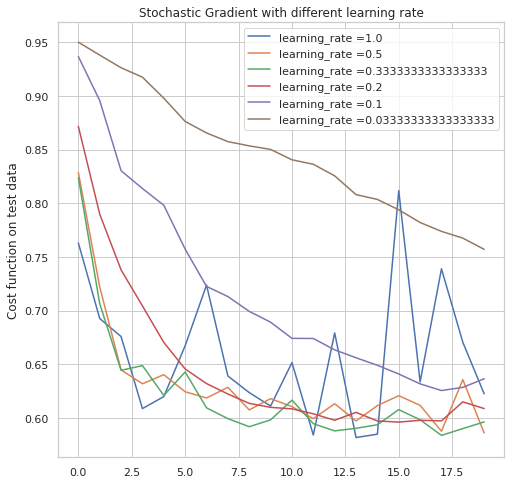

In [ ]:
#Impact of the learning rate on test data
plt.figure(figsize = (8,8))

nbr_iter = 20
lambda = 0
size = 20
for tau in taus : 
    x,costs,val_costs = stochastic_grad2(A,tau,y,lambda,size, nbr_iter)
    plt.plot(range(nbr_iter),val_costs, label = 'learning_rate ='+str(tau/tau_max))
plt.title('Stochastic Gradient with different learning rate')
plt.ylabel('Cost function on test data')
plt.legend()
plt.show()


diagonal scaling

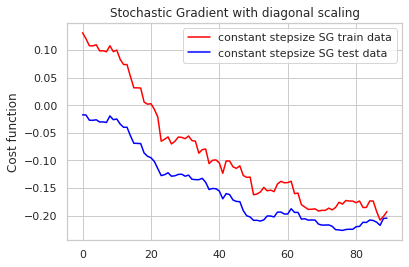

In [ ]:
lambda = 0
size = 1
nbr_iter= 120
nbr_disp = 90

x,costs,val_costs = stochastic_grad2(A,tau,y,lambda,size,nbr_iter)

plt.plot(np.arange(0,nbr_disp),np.log10(costs)[:nbr_disp],color="red",label = 'constant stepsize SG train data')
plt.plot(np.arange(0,nbr_disp),np.log10(val_costs)[:nbr_disp],color="blue",label = 'constant stepsize SG test data')


plt.title('Stochastic Gradient with diagonal scaling')
plt.ylabel('Cost function')
plt.legend()
plt.show()

## IV. Régularization

# LASSO

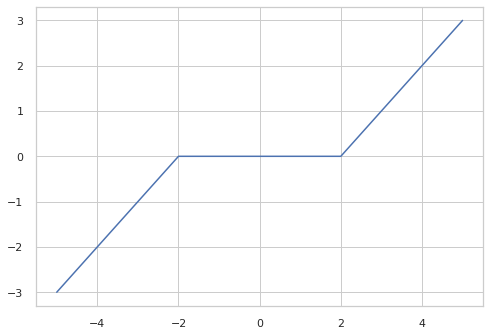

In [142]:
def Soft(x,s): return np.maximum( abs(x)-s, np.zeros(x.shape)  ) * np.sign(x)
t = np.linspace(-5,5,201)
plt.clf
plt.plot(t,Soft(t,2)) 
plt.axis('tight');

In [143]:
def logistic_cost_lasso(A,y,x,lambda):
    # p = yAx
    p = y * A.dot(x)
    return np.mean(logistic(-p)) + lambda * np.linalg.norm(x,1)

def forward_backward(A,y,lambda,tau,d):
    E_test = []
    flist = np.zeros((nbr_iter,1))
    x = np.zeros(d)
    for i in np.arange(0,nbr_iter):
        flist[i] = logistic_cost_lasso(A,y,x,lambda)
        x = ISTA(A,y,x,lambda,tau)
        p = y1 * A1.dot(x)
        E_test.append(np.mean(logistic(-p)))
    return(flist,x,E_test)

def ISTA(A,y,x,lambda,tau): 
    gd = calcul_grad(A,y,x,lambda)
    return Soft( x-tau*(gd ), lambda*tau )

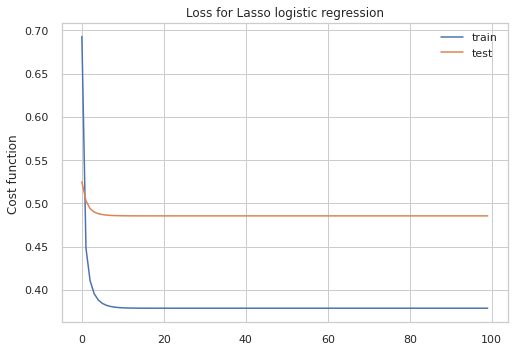

In [144]:
#Computing Lasso 
tau = tau_max/2
lambda = 0.1
nbr_iter = 100
f,x,E_test = forward_backward(A,y,lambda,tau,d)

plt.plot(range(nbr_iter),f,label ='train')
plt.plot(range(nbr_iter),E_test,label='test')
plt.title('Loss for Lasso logistic regression')
plt.ylabel('Cost function ')
plt.legend()
plt.show()

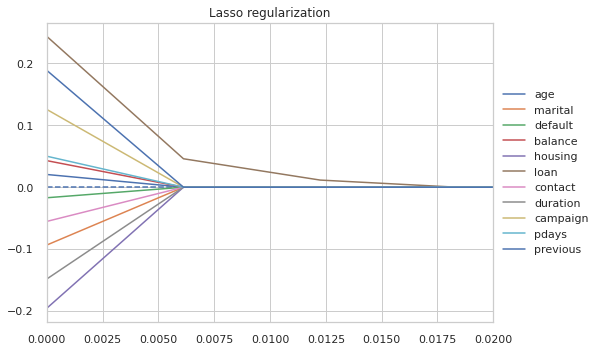

In [152]:
lamdas = np.linspace(0,0.3,50)
x1 = []
x2 = []
x3 = []
x4 = []
x5 = []
x6 = []
x7 = []

x9 = []
x10 = []
x11 = []
x12 = []
x13 = []

for lambda in lamdas:
    f, x ,E_test2 = forward_backward(A,y,lambda,tau,d)
    x1.append(x[0])
    x2.append(x[1])
    x3.append(x[2])
    x4.append(x[3])
    x5.append(x[4])
    x6.append(x[6])
    x7.append(x[7])

    x9.append(x[9])
    x10.append(x[10])
    x11.append(x[11])
    x12.append(x[12])



plt.axhline (y=0,linestyle='--') 
plt.plot(lamdas,x1,label='age')
plt.plot(lamdas,x2,label = 'marital')
plt.plot(lamdas,x3,label ='default')
plt.plot(lamdas,x4,label = 'balance')
plt.plot(lamdas,x5,label = 'housing')
plt.plot(lamdas,x6,label = 'loan')
plt.plot(lamdas,x7,label='contact')

plt.plot(lamdas,x9,label ='duration')
plt.plot(lamdas,x10,label = 'campaign')
plt.plot(lamdas,x11,label = 'pdays')
plt.plot(lamdas,x12,label = 'previous')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Lasso regularization')
plt.xlim([0, 0.02])
plt.show()

# Ridge

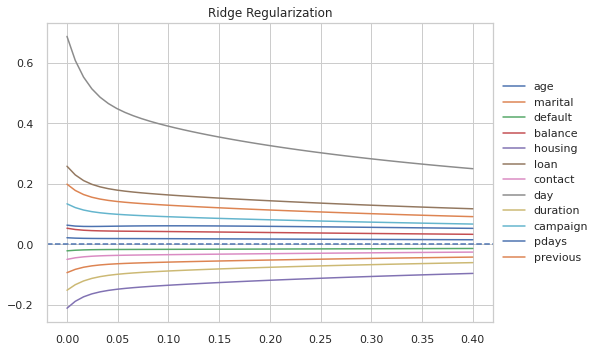

In [123]:
lamdas = np.linspace(0,0.4,50)
x1 = []
x2 = []
x3 = []
x4 = []
x5 = []
x6 = []
x7 = []
x8 = []
x9 = []
x10 = []
x11 = []
x12 = []
x13 = []

for lambda in lamdas:
    x,cost_values1,gd = gradient_descent(A,y,tau,nbr_iter,lambda) 
    x1.append(x[0])
    x2.append(x[1])
    x3.append(x[2])
    x4.append(x[3])
    x5.append(x[4])
    x6.append(x[6])
    x7.append(x[7])
    x8.append(x[8])
    x9.append(x[9])
    x10.append(x[10])
    x11.append(x[11])
    x12.append(x[12])
        
plt.axhline (y=0,linestyle='--')
 
plt.plot(lamdas,x1,label='age')
plt.plot(lamdas,x2,label = 'marital')
plt.plot(lamdas,x3,label ='default')
plt.plot(lamdas,x4,label = 'balance')
plt.plot(lamdas,x5,label = 'housing')
plt.plot(lamdas,x6,label = 'loan')
plt.plot(lamdas,x7,label='contact')
plt.plot(lamdas,x8,label = 'day')
plt.plot(lamdas,x9,label ='duration')
plt.plot(lamdas,x10,label = 'campaign')
plt.plot(lamdas,x11,label = 'pdays')
plt.plot(lamdas,x12,label = 'previous')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Ridge Regularization')
plt.show()

# V. Optional algorithm 


## Armijo and Cauchy step

In [ ]:
eps = 10^-4
rhoinit = 1
omega = 0.1

# Logistic cost function
def logistic_costpas(A,y,x,lambda):
      # p = yAx
        p = 0
        return np.mean(logistic(-p)) + lambda * np.linalg.norm(x) ** 2 / 2.
 
def pasOptimalCauchyFQ(y,x,A,lambda): #ro
    g = compute_grad(A,y,x,lambda);
    ro = (A*x.transpose())
    return ro


def gradient_descent_pas(A,y,tau,niter,lambda,pas):
    d = A.shape[1]
    x_init = np.random.randn(d)
    x = x_init
    cost_values = []
    grad_values = []
    for i in range(niter):
        gd = compute_grad(A,y,x,lambda)
        grad_values.append(np.linalg.norm(gd))
        if pas == 1:
          tau = pasOptimalCauchyFQ(y,x,A,lambda)
        if pas == 2:
          tau = pasArmijo(x,y,omega,tau,rhoinit)
        x = x-tau*gd
        func = logistic_costpas(A,y,x,lambda)
        cost_values.append(func)
    return x,cost_values,grad_values



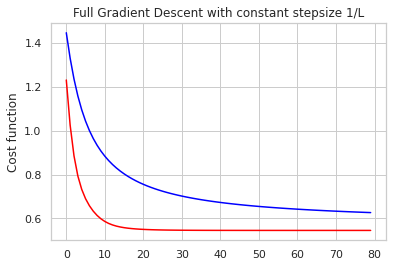

In [ ]:
plt.plot(range(niter),cost_values, color = 'red')
plt.plot(range(niter),cost_values1, color = 'blue')
plt.title('Full Gradient Descent with constant stepsize 1/L')
plt.ylabel('Cost function')
plt.show()

# Newton Second Order Method

In [160]:
nbr_iter = 30
tau = tau_max/2 
lambda = 0

# Function to compute the hessian
def calcul_hessian(A,y,x,lambda):
        H = np.zeros((d,d))
        for i in range(n):
            aux = np.exp(-y[i]*(A[i].dot(x)))
            a = A[i,:].reshape((1,8))
            b = A[i,:].reshape((8,1))
            G = (aux/(1+aux)**2)*(b.dot(a))
            for k in range(8):
                for l in range(8):
                    H[k,l] += (1/n)*G[k,l]
        return(H)

# Newton second order function
def Newton(A,y,nbr_iter,lambda):
    costs = []
    for i in range(nbr_iter):
        gd = calcul_grad(A,y,x,lambda)
        H = calcul_hessian(A,y,x,lambda)
        x = x-np.linalg.pinv(H).dot(gd)
        func = logistic_cost(A,y,x,lambda)
        costs.append(func)
    return x, costs

In [ ]:
np.exp(-y[1]*(A[4].dot(x)))
-y[1]/(A[4].dot(x))

0.15413258832667465

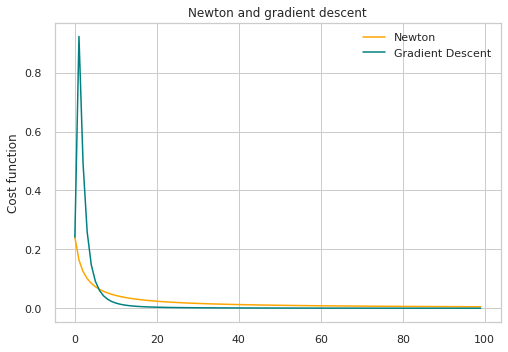

In [159]:
tau = 1/(L)
nbr_iter = 100
lambda = 0
x,costs2 = Newton(A,y,nbr_iter,lambda,i,x):
x,costs1,gd = gradient_descent(A,y,tau,nbr_iter,lambda)

costs2[0] = costs1[0]
#Comparison of nesterov and GD
plt.plot(range(nbr_iter),costs1, color = 'orange',label='Newton')
plt.plot(range(nbr_iter),costs2, color = 'teal',label='Gradient Descent')
plt.title('Newton and gradient descent')
plt.ylabel('Cost function')
plt.legend()
plt.show()


# SG with momentum

In [ ]:
def momentum(A,tau,y,lambda,nbr_iter,beta) :
    d = A.shape[1]
    n = A.shape[0]
    x_init = np.random.randn(d)
    x = x_init
    x_vals = [list(x)]
    x_vals = x_vals + [list(x)]
    cost_values = []
    val_cost_values = []

    for k in range(nbr_iter):
        ik = np.random.choice(n,1,replace=False)# Batch gradient
        sg = np.zeros(d)
        old = np.array(x_vals[-1][0])

        gi = grad_i(A,ik,old,y,lambda)
        sg = gi
        very_old = np.array(x_vals[-2][0])
        sg = sg.reshape(d)
        x = old - tau * sg + beta*(old-very_old)
        
        x_vals.append([list(x)])
        func = logistic_cost(A,y,x,lambda)
        cost_values.append(func)
        val_func = logistic_cost(A1,y1,x,lambda)
        val_cost_values.append(val_func)

    return x, cost_values, val_cost_values

In [ ]:
tau = 1/(4*L)
betas = [0,0.01,0.02,0.03,0.04]
lambda = 0
nbr_iter = 70
for beta in betas :
    all_cost_values = np.zeros((10000,70))
    for exp in range(70):
        x, cost_values, val_cost_values = momentum(A,tau,y,lambda,nbr_iter,beta)
        all_cost_values[exp,:] = cost_values
    mean_cost_values = all_cost_values.mean(axis = 0)
    plt.plot(mean_cost_values,label ='beta='+str(beta))
plt.legend()
plt.title('Stochastic gradient with momentum for different values of beta')
plt.show()